# Imports

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Read data and do some cleaning

In [8]:
df = pd.read_csv('data.csv')

In [9]:
df.head()

,t,values
0,1960,0.0
1,1961,0.0
2,1962,0.0
3,1963,0.0
4,1964,0.0


## Obligatory data cleaning. This is if it's in years
- Best case is to set the index as your time period

In [10]:
df = df[df['t'] != 2020]
df.reset_index(inplace=True)
# Set the Year column as the index
df['t'] = pd.to_datetime(df['t'], format='%Y')
df.set_index('t', inplace=True)

# Modeling
- This notebook uses a SARIMA model. Give a set of values for p, d, and q below and it will do a grid search to select the best p, d, and q. I found this is better than auto-modeling for ARIMA models.
- This is a good baseline value for p, d, and q - but it always depends on use case. This gives an ok baseline on the definitions for p, d, and q based on your domain knowledge of the use case https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/
- The case below uses Singapore's yearly FDI up until 2023. It predicts the next

In [48]:
# Parameters to test for ARIMA
p_values = range(0, 5)  # AR term
d_values = range(0, 4)  # Differencing term
q_values = range(0, 5)  # MA term

# Initialize variables to store the best results
best_aic = np.inf
best_order = None
best_model = None

In [49]:
# Grid search over p, d, q
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Fit ARIMA model
                model = ARIMA(df['FDI'], order=(p, d, q))
                model_fit = model.fit()
                
                # Get the AIC of the fitted model
                aic = model_fit.aic
                
                # Print progress
                print(f"ARIMA({p}, {d}, {q}) - AIC: {aic}")
                
                # Check if the model with this (p, d, q) has the lowest AIC
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except Exception as e:
                # Skip models that fail to fit
                print(f"ARIMA({p}, {d}, {q}) failed to fit: {e}")
                continue

# Output the best model and parameters
print(f"Best ARIMA model: {best_order} with AIC: {best_aic}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarnin

ARIMA(0, 0, 0) - AIC: 645.5914713410704
ARIMA(0, 0, 1) - AIC: 586.1926829480251
ARIMA(0, 0, 2) - AIC: 562.6044432599144
ARIMA(0, 0, 3) - AIC: 546.4894733776509
ARIMA(0, 0, 4) - AIC: 521.4115458753295
ARIMA(0, 1, 0) - AIC: 477.00776405952564
ARIMA(0, 1, 1) - AIC: 478.57399883587243
ARIMA(0, 1, 2) - AIC: 480.0622151784783
ARIMA(0, 1, 3) - AIC: 472.5746026339964
ARIMA(0, 1, 4) - AIC: 474.33925809402507
ARIMA(0, 2, 0) - AIC: 514.8769953497301
ARIMA(0, 2, 1) - AIC: 468.46787082953506
ARIMA(0, 2, 2) - AIC: 457.807128631322
ARIMA(0, 2, 3) - AIC: 457.8031242518235


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarnin

ARIMA(0, 2, 4) - AIC: 459.799756408434
ARIMA(0, 3, 0) - AIC: 574.6974557006326
ARIMA(0, 3, 1) - AIC: 513.5301757340094
ARIMA(0, 3, 2) - AIC: 464.35481732946766
ARIMA(0, 3, 3) - AIC: 452.6825247080695
ARIMA(0, 3, 4) - AIC: 453.5307612907655
ARIMA(1, 0, 0) - AIC: 492.42078986050313
ARIMA(1, 0, 1) - AIC: 494.02021984673434
ARIMA(1, 0, 2) - AIC: 495.5346219796498
ARIMA(1, 0, 3) - AIC: 488.1675662783726
ARIMA(1, 0, 4) - AIC: 490.35294638363877
ARIMA(1, 1, 0) - AIC: 478.54610293730394
ARIMA(1, 1, 1) - AIC: 480.5459608418198
ARIMA(1, 1, 2) - AIC: 467.30589195570815
ARIMA(1, 1, 3) - AIC: 467.03037438460603


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

ARIMA(1, 1, 4) - AIC: 468.4126905275531
ARIMA(1, 2, 0) - AIC: 495.8152182180245
ARIMA(1, 2, 1) - AIC: 464.92779826038316
ARIMA(1, 2, 2) - AIC: 457.2804946197587
ARIMA(1, 2, 3) - AIC: 457.66622299598606
ARIMA(1, 2, 4) - AIC: 459.66528564614356
ARIMA(1, 3, 0) - AIC: 547.7740280820876
ARIMA(1, 3, 1) - AIC: 495.6111422136985
ARIMA(1, 3, 2) - AIC: 459.6170608978422
ARIMA(1, 3, 3) - AIC: 468.21623291968706


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarnin

ARIMA(1, 3, 4) - AIC: 453.0318145953804
ARIMA(2, 0, 0) - AIC: 493.99395417221115
ARIMA(2, 0, 1) - AIC: 495.993892766332
ARIMA(2, 0, 2) - AIC: 496.33097182824747
ARIMA(2, 0, 3) - AIC: 489.55037504347615
ARIMA(2, 0, 4) - AIC: 486.23668316456343
ARIMA(2, 1, 0) - AIC: 480.54471287334724
ARIMA(2, 1, 1) - AIC: 473.61142834838023


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provi

ARIMA(2, 1, 2) - AIC: 467.0078439286757
ARIMA(2, 1, 3) - AIC: 467.2952907070466
ARIMA(2, 1, 4) - AIC: 469.28928855904906
ARIMA(2, 2, 0) - AIC: 465.95072256124564
ARIMA(2, 2, 1) - AIC: 456.49469687462283
ARIMA(2, 2, 2) - AIC: 458.4486867046968
ARIMA(2, 2, 3) - AIC: 458.4994969327014
ARIMA(2, 2, 4) - AIC: 462.68522884809363
ARIMA(2, 3, 0) - AIC: 510.73287285255077
ARIMA(2, 3, 1) - AIC: 466.8550861849633


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

ARIMA(2, 3, 2) - AIC: 451.5101444002476
ARIMA(2, 3, 3) - AIC: 453.4355604285352
ARIMA(2, 3, 4) - AIC: 456.09070926423436
ARIMA(3, 0, 0) - AIC: 495.9933327370197
ARIMA(3, 0, 1) - AIC: 495.4767704016862


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWar

ARIMA(3, 0, 2) - AIC: 496.5831803496739
ARIMA(3, 0, 3) - AIC: 489.284748026056
ARIMA(3, 0, 4) - AIC: 490.27211363310175
ARIMA(3, 1, 0) - AIC: 471.18779051689745
ARIMA(3, 1, 1) - AIC: 465.80337297871114
ARIMA(3, 1, 2) - AIC: 467.7849482665759
ARIMA(3, 1, 3) - AIC: 469.27985977108864


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been pro

ARIMA(3, 1, 4) - AIC: 468.56956892977604
ARIMA(3, 2, 0) - AIC: 459.16354886818607
ARIMA(3, 2, 1) - AIC: 458.44884300187266
ARIMA(3, 2, 2) - AIC: 460.44889727786517
ARIMA(3, 2, 3) - AIC: 459.86377099303576
ARIMA(3, 2, 4) - AIC: 455.55963018281653
ARIMA(3, 3, 0) - AIC: 486.53077867576457
ARIMA(3, 3, 1) - AIC: 460.0807961477404


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been pro

ARIMA(3, 3, 2) - AIC: 453.4414388110206
ARIMA(3, 3, 3) - AIC: 455.1611684765005
ARIMA(3, 3, 4) - AIC: 457.3507559602463
ARIMA(4, 0, 0) - AIC: 486.8278339499605
ARIMA(4, 0, 1) - AIC: 482.5928671515373
ARIMA(4, 0, 2) - AIC: 485.3903751474124


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWar

ARIMA(4, 0, 3) - AIC: 490.3598417848855
ARIMA(4, 0, 4) - AIC: 492.37345259812395
ARIMA(4, 1, 0) - AIC: 468.0614448934076
ARIMA(4, 1, 1) - AIC: 467.7845104979706
ARIMA(4, 1, 2) - AIC: 469.7061298971075
ARIMA(4, 1, 3) - AIC: 471.5192656645429


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWar

ARIMA(4, 1, 4) - AIC: 471.16759522982136
ARIMA(4, 2, 0) - AIC: 459.52401078620215
ARIMA(4, 2, 1) - AIC: 460.44875804575787
ARIMA(4, 2, 2) - AIC: 462.4488321997557
ARIMA(4, 2, 3) - AIC: 460.0350889874884
ARIMA(4, 2, 4) - AIC: 456.5651230571774
ARIMA(4, 3, 0) - AIC: 475.98569829601655


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarnin

ARIMA(4, 3, 1) - AIC: 460.2545211389135
ARIMA(4, 3, 2) - AIC: 461.6552882062758
ARIMA(4, 3, 3) - AIC: 457.8196171334352
ARIMA(4, 3, 4) - AIC: 452.61430859743876
Best ARIMA model: (2, 3, 2) with AIC: 451.5101444002476


In [60]:
# Optionally, forecast using the best model
forecast_steps = 7  # Forecast for the next 5 years
forecast = best_model.forecast(steps=forecast_steps)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [61]:
# Print the forecasted values
print("Forecasted FDI values:")
for i in range(forecast_steps):
    print(f"Year {df.index[-1].year + i + 1}: {list(forecast)[i]:.2f}")

Forecasted FDI values:
Year 2024: 187.32
Year 2025: 205.03
Year 2026: 230.28
Year 2027: 254.25
Year 2028: 280.43
Year 2029: 310.63
Year 2030: 342.58


/var/folders/5b/vs7pvmkx7_145_8cvlsmzqn40000gn/T/ipykernel_10574/3457883057.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(df.index[-1] + pd.Timedelta(days=365), periods=forecast_steps, freq='Y')


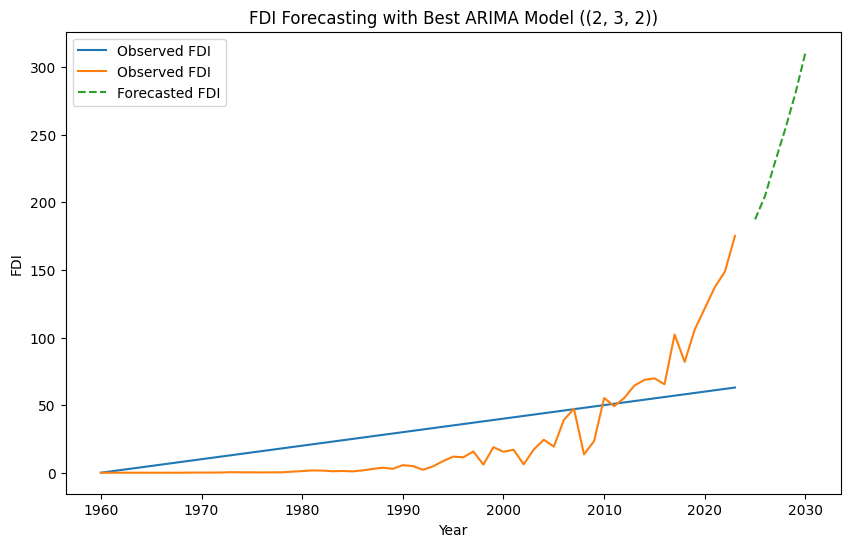

In [59]:
# Plot the forecast
forecast_index = pd.date_range(df.index[-1] + pd.Timedelta(days=365), periods=forecast_steps, freq='Y')
plt.figure(figsize=(10, 6))
plt.plot(df, label='Observed FDI')
plt.plot(forecast_index, forecast, label='Forecasted FDI', linestyle='--')
plt.title(f'FDI Forecasting with Best ARIMA Model ({best_order})')
plt.xlabel('Year')
plt.ylabel('FDI')
plt.legend()
plt.show()

In [ ]:
# Plot the forecast
forecast_index = pd.date_range(df.index[-1] + pd.Timedelta(days=365), periods=forecast_steps, freq='Y')
plt.figure(figsize=(10, 6))
plt.plot(df, label='Observed FDI')
plt.plot(forecast_index, forecast, label='Forecasted FDI', linestyle='--')
plt.title(f'FDI Forecasting with Best ARIMA Model ({best_order})')
plt.xlabel('Year')
plt.ylabel('FDI')
plt.legend()
plt.show()
